In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
import matplotlib.gridspec as gridspec 

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics 

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import scikitplot.metrics as splt

In [2]:
file_path_full_training_set = 'KDDTrain+.csv' 
file_path_test = 'KDDTest+.csv'  

df = pd.read_csv(file_path_full_training_set)
test_df = pd.read_csv(file_path_test)


In [3]:
cols = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack', 'level']
df.columns = cols
test_df.columns = cols

df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


# EDA

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [6]:
df.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [7]:
test_df.nunique()

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate             

,Missing Records,Percentage (%)
duration,0,0.0
protocol_type,0,0.0
service,0,0.0
flag,0,0.0
src_bytes,0,0.0
dst_bytes,0,0.0
land,0,0.0
wrong_fragment,0,0.0
urgent,0,0.0
hot,0,0.0


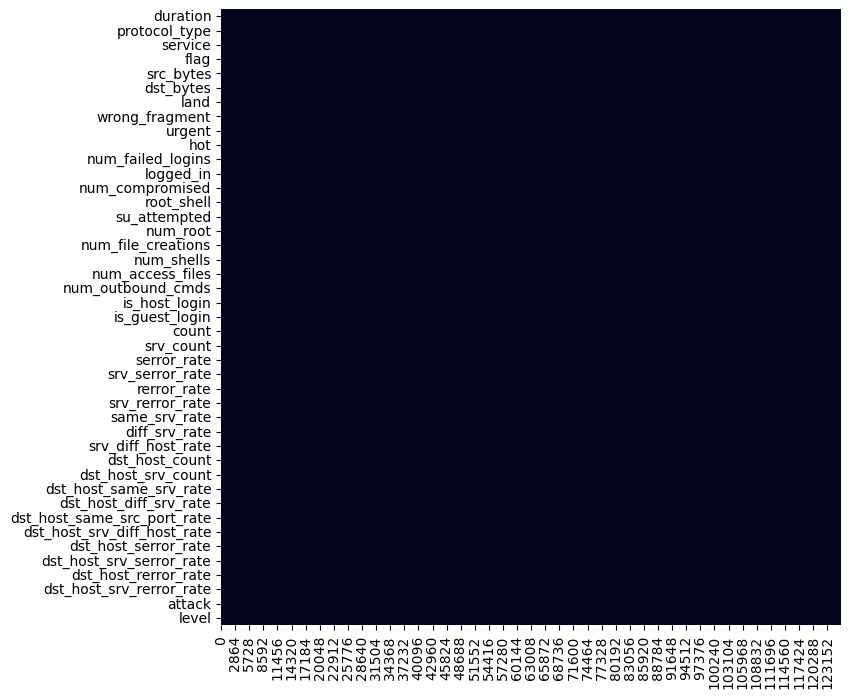

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(pd.isnull(df.T), cbar=False)

pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/len(df)], 
              axis=1).rename(columns={0:'Missing Records', 1:'Percentage (%)'})

In [9]:
def plot_hist(df, cols, title):
    grid = gridspec.GridSpec(10, 2, wspace=0.5, hspace=0.5) 
    fig = plt.figure(figsize=(15,25)) 
    
    for n, col in enumerate(df[cols]):         
        ax = plt.subplot(grid[n]) 

        ax.hist(df[col], bins=20) 
        #ax.set_ylabel('Count', fontsize=12)
        ax.set_title(f'{col} distribution', fontsize=15) 
    
    fig.suptitle(title, fontsize=20)
    grid.tight_layout(fig, rect=[0, 0, 1, 0.97])
    plt.show()

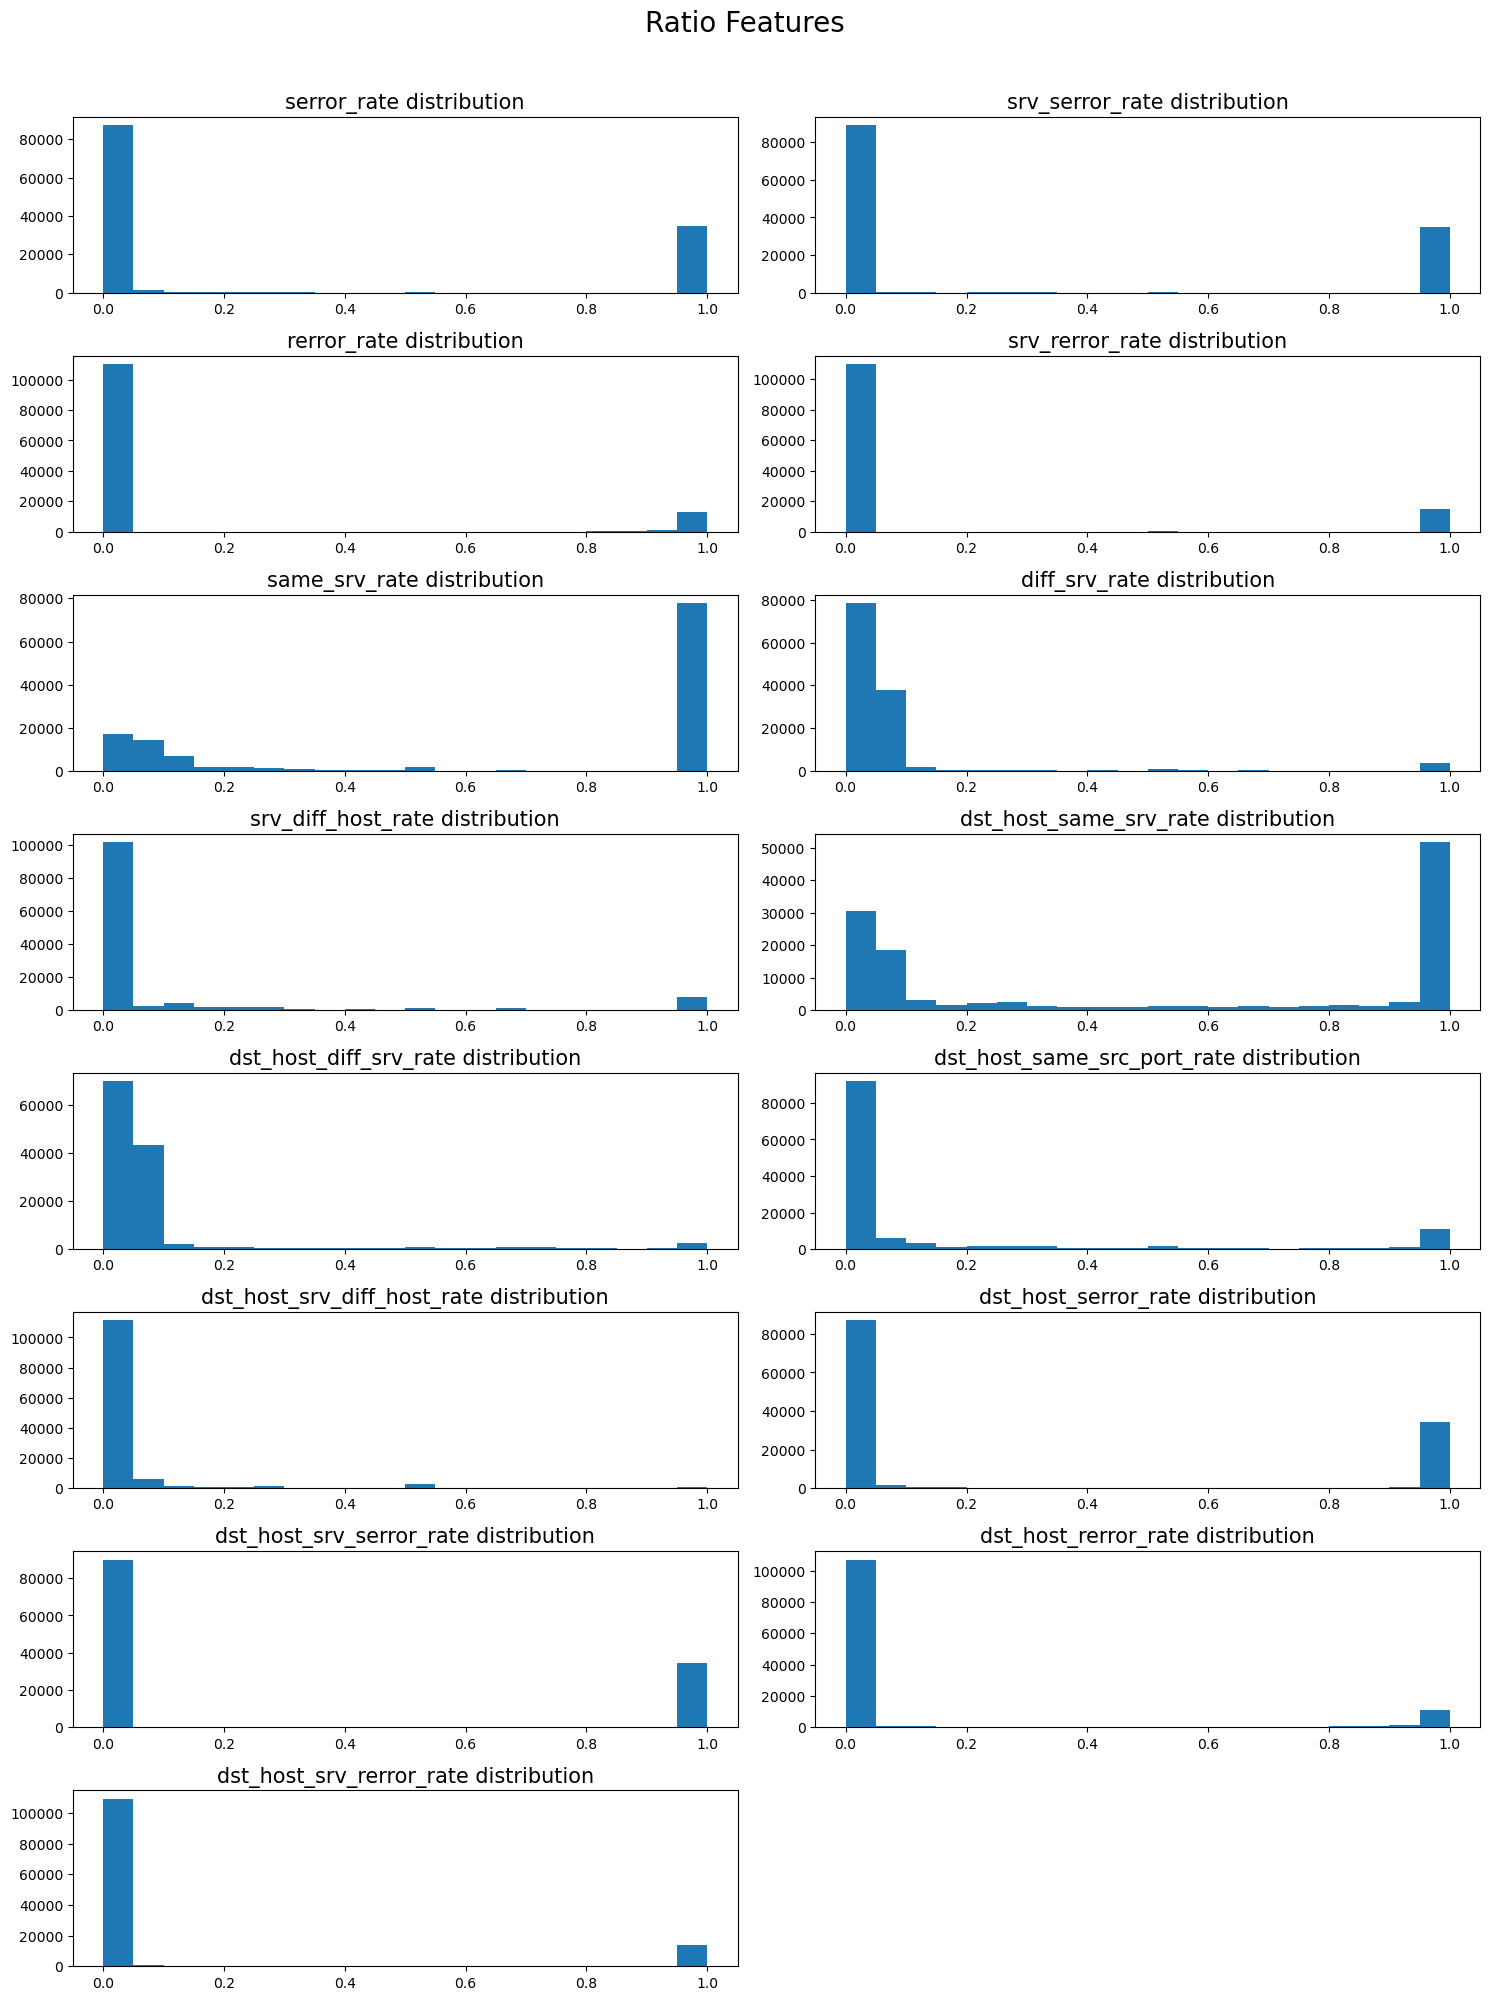

In [10]:
rate_cols = [ 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

plot_hist(df, rate_cols, 'Ratio Features')

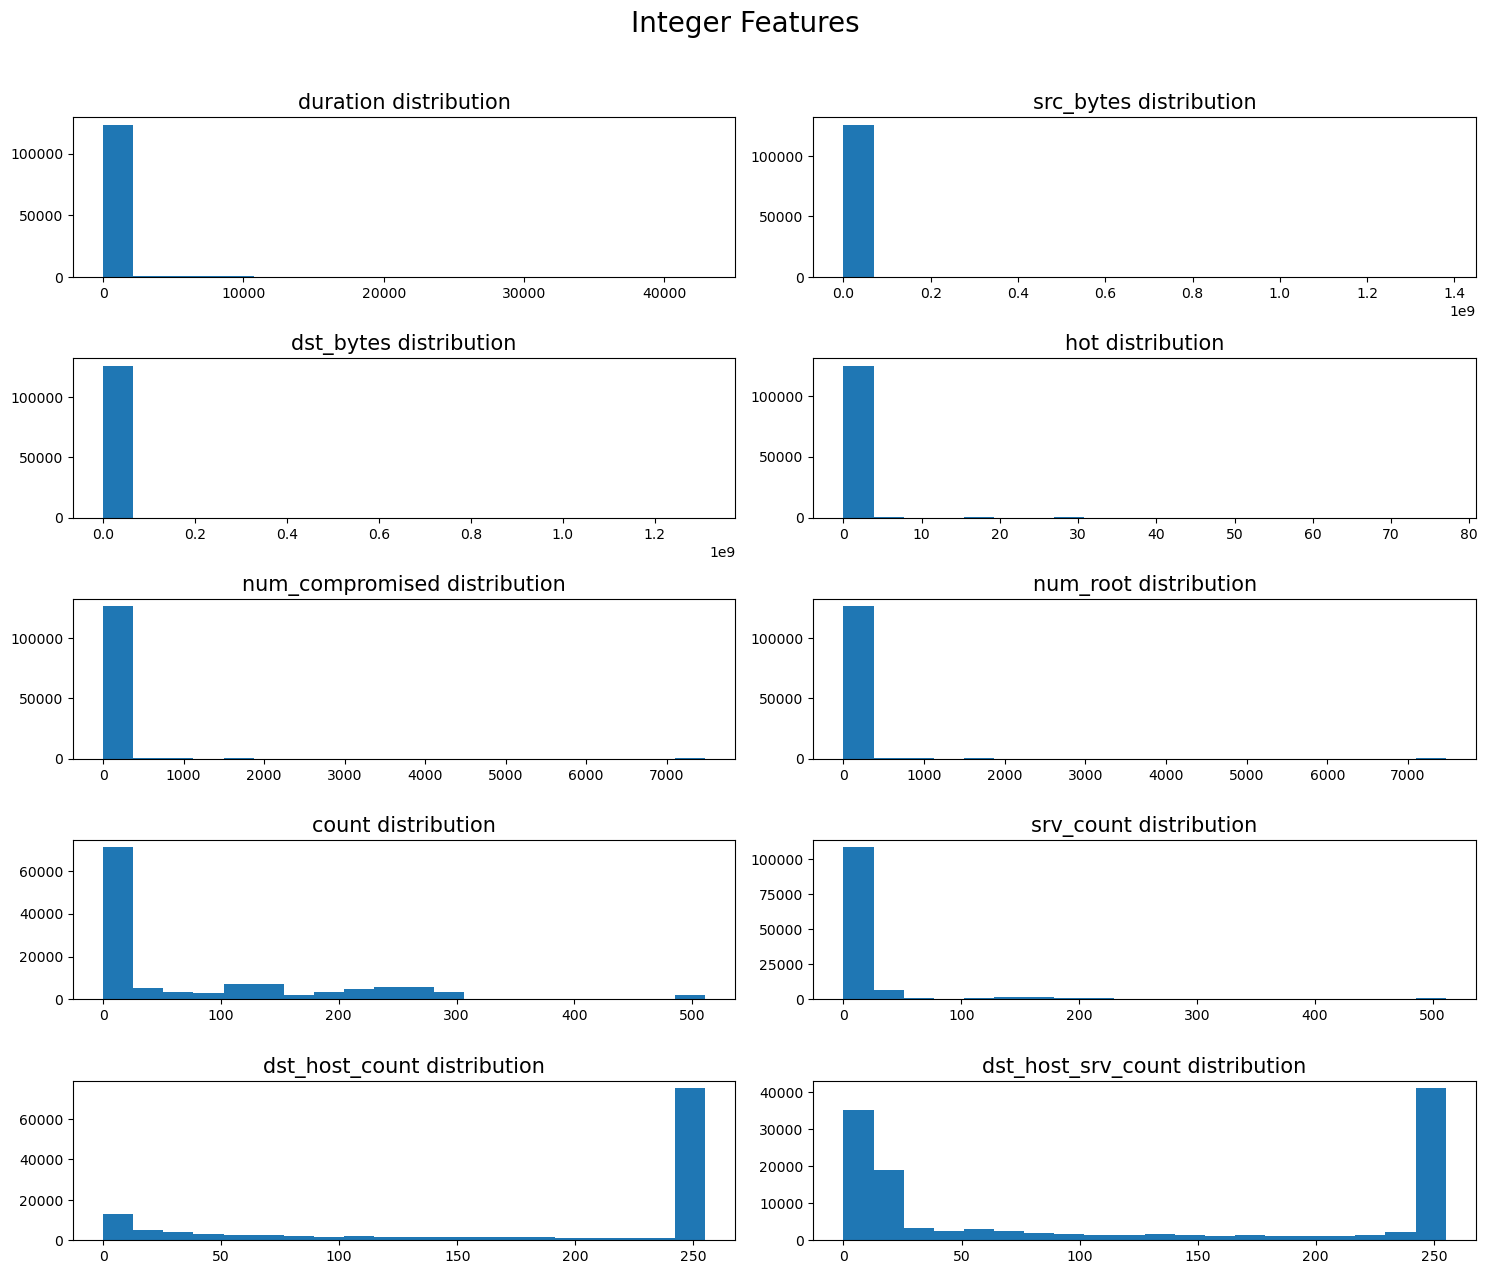

In [11]:
hist_cols = [ 'duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count']
    
plot_hist(df, hist_cols, 'Integer Features')

In [12]:
df['attack_state'] = df['attack'].map(lambda x: 0 if x == 'normal' else 1)
test_df['attack_state'] = test_df['attack'].map(lambda x: 0 if x == 'normal' else 1)

df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


In [13]:
(df.attack_state == 1).sum()/len(df) #No.of attack states in training set

0.4654208871812784

In [14]:
(test_df.attack_state == 1).sum()/len(df) # No.of attack states in test set

0.10186390626488426

C:\Users\kiets\AppData\Local\Temp\ipykernel_33252\2054470998.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df, x="attack_state", fill=True, common_norm=False, palette="crest", alpha=.2, linewidth=10)


<Axes: xlabel='attack_state', ylabel='Density'>

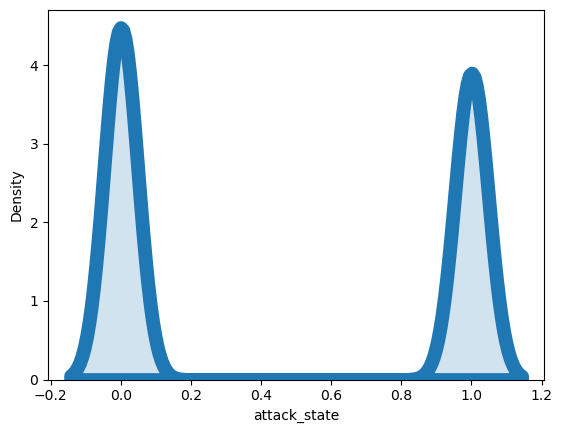

In [15]:
sns.kdeplot(data=df, x="attack_state", fill=True, common_norm=False, palette="crest", alpha=.2, linewidth=10)

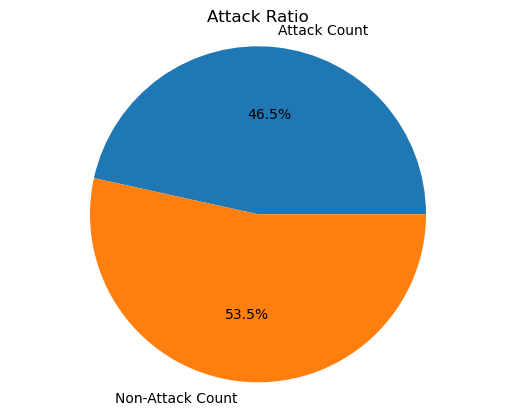

In [16]:
attack_count = (df.attack_state == 1).sum()
non_attack_count = (df.attack_state == 0).sum()
myData = [attack_count, non_attack_count]

my_labels = 'Attack Count', 'Non-Attack Count'
plt.pie(myData, labels=my_labels, autopct='%1.1f%%')
plt.title('Attack Ratio')
plt.axis('equal')
plt.show()


In [17]:
DoS_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
Probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
U2R = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
R2L = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

attack_labels = ['Normal','DoS','Probe','U2R','R2L']

def class_attack(attack):
    if attack in DoS_attacks:
        attack_type = 1
    elif attack in Probe_attacks:
        attack_type = 2
    elif attack in U2R:
        attack_type = 3
    elif attack in R2L:
        attack_type = 4
    else:
        attack_type = 0       
    return attack_type

#Create the attack_class column and add it to the dataset with the numerical equivalent of each class of attack.
attack_class = df.attack.apply(class_attack)
df['attack_class'] = attack_class

test_attack_class = test_df.attack.apply(class_attack)
test_df['attack_class'] = test_attack_class

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state,attack_class
0,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1,1


In [18]:
df.tail() 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state,attack_class
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20,1,1
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.0,0.00,0.0,0.00,0.0,normal,21,0,0
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.00,0.0,0.72,0.0,0.01,0.0,normal,18,0,0
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20,1,1
125971,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.30,0.0,0.00,0.0,0.00,0.0,normal,21,0,0


In [19]:
Normal = (df.attack_class == 0).sum()/len(df)
print('Normal = {:.2f}%'.format(Normal * 100))
DoSDDoS = (df.attack_class == 1).sum()/len(df)
print('DoS/DDoS = {:.2f}%'.format(DoSDDoS * 100))
Probe = (df.attack_class == 2).sum()/len(df)
print("Probe = {:.2f}%".format(Probe * 100))
U2R = (df.attack_class == 3).sum()/len(df)
print('U2R = {:.2f}%'.format(U2R * 100))
R2L = (df.attack_class == 4).sum()/len(df)
print('R2L = {:.2f}%'.format(R2L * 100))

Normal = 53.47%
DoS/DDoS = 36.46%
Probe = 9.25%
U2R = 0.03%
R2L = 0.79%


In [20]:
Normal = (test_df.attack_class == 0).sum()/len(test_df)
print('Normal = {:.2f}%'.format(Normal * 100))
DoSDDoS = (test_df.attack_class == 1).sum()/len(test_df)
print('DoS/DDoS = {:.2f}%'.format(DoSDDoS * 100))
Probe = (test_df.attack_class == 2).sum()/len(test_df)
print("Probe = {:.2f}%".format(Probe * 100))
U2R = (test_df.attack_class == 3).sum()/len(test_df)
print('U2R = {:.2f}%'.format(U2R * 100))
R2L = (test_df.attack_class == 4).sum()/len(test_df)
print('R2L = {:.2f}%'.format(R2L * 100))

Normal = 43.72%
DoS/DDoS = 33.09%
Probe = 10.74%
U2R = 0.29%
R2L = 12.17%


In [21]:
attack_vs_class = pd.crosstab(index=df.attack_class, columns=df.attack)
attack_vs_class

attack,back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,...,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster
attack_class,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,9,0,0,...,0,0,0,0,0,0,0,0,0,0
1,956,0,0,0,0,0,18,0,0,41214,...,0,201,0,0,0,2646,0,892,0,0
2,0,0,0,0,0,3599,0,0,0,0,...,0,0,2931,0,3633,0,0,0,0,0
3,0,30,0,0,0,0,0,0,0,0,...,0,0,0,10,0,0,0,0,0,0
4,0,0,8,53,11,0,0,0,7,0,...,4,0,0,0,0,0,2,0,890,20


In [22]:
attack_vs_DDoS = pd.crosstab(df.attack_class, df.attack == "DoS/DDoS")
attack_vs_DDoS

attack,False
attack_class,
0,67351
1,45927
2,11656
3,43
4,995


In [23]:
def bake_pies(data_list,labels):
    list_length = len(data_list)
    
    # setup for mapping colors
    color_list = sns.color_palette()
    color_cycle = itertools.cycle(color_list)
    cdict = {}
    
    # build the subplots
    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)
    
    # loop through the data sets and build the charts
    for count, data_set in enumerate(data_list): 
        
        # update our color mapt with new values
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)
       
        # build the wedges
        wedges,texts = axs[count].pie(data_set,
                           colors=[cdict[v] for v in data_set.index])

        # build the legend
        axs[count].legend(wedges, data_set.index,
                           title="Durum",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        # set the title
        axs[count].set_title(labels[count])
        
    return axs 

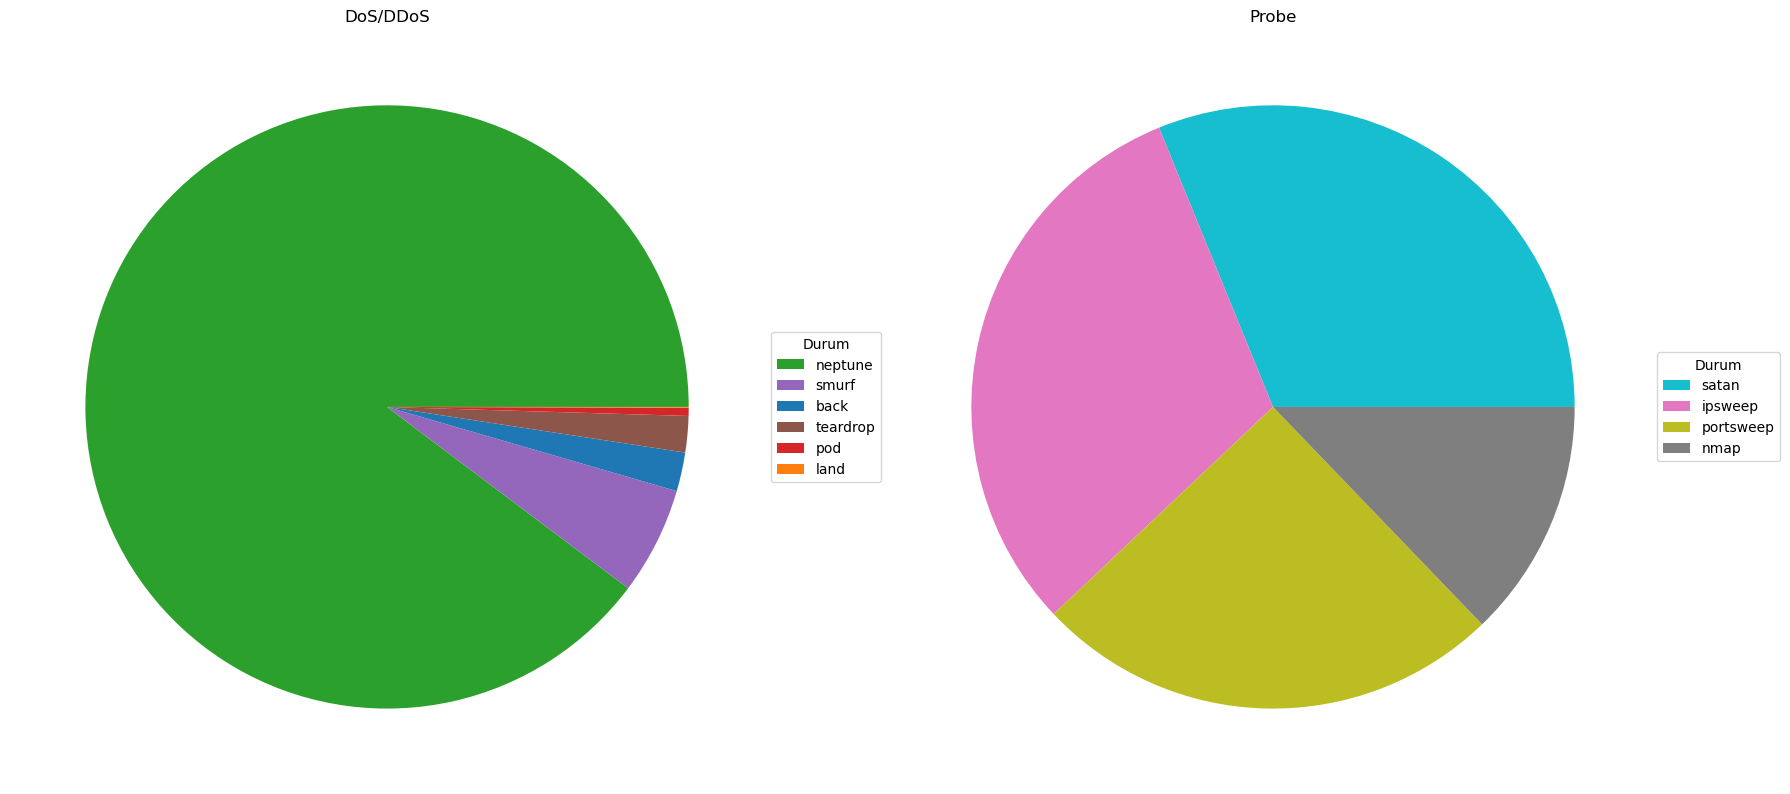

In [24]:
DoS_DDoS_class = df.loc[df.attack_class == 1].attack.value_counts()
probe_class = df.loc[df.attack_class == 2].attack.value_counts()

flag_axs = bake_pies([DoS_DDoS_class, probe_class], ['DoS/DDoS','Probe'])
plt.show()

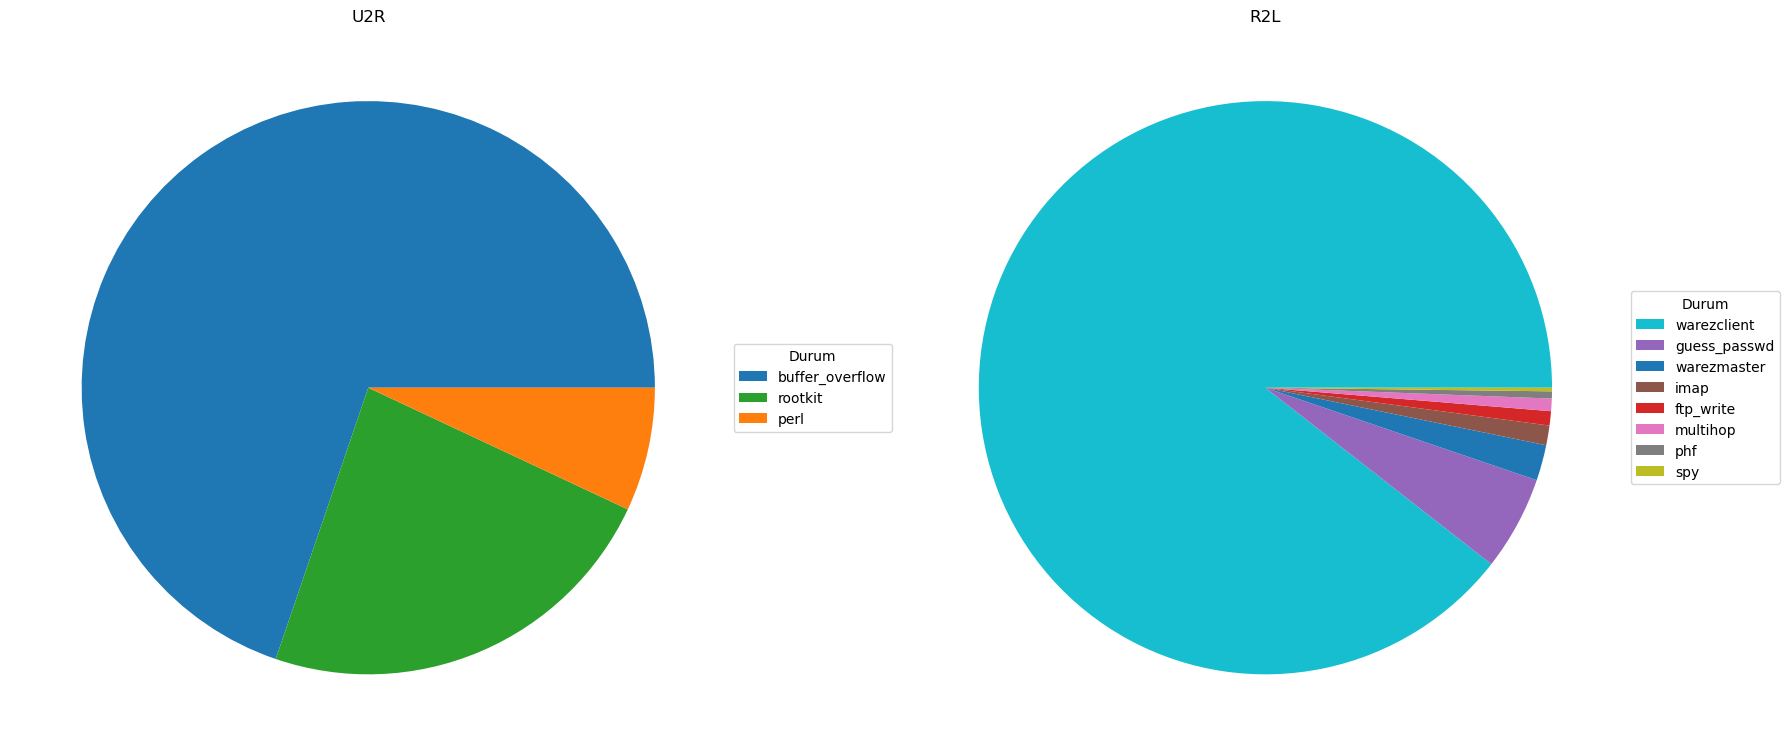

In [25]:
U2R_class = df.loc[df.attack_class == 3].attack.value_counts()
R2L_class = df.loc[df.attack_class == 4].attack.value_counts()

flag_axs = bake_pies([U2R_class,R2L_class], ['U2R','R2L'])
plt.show()

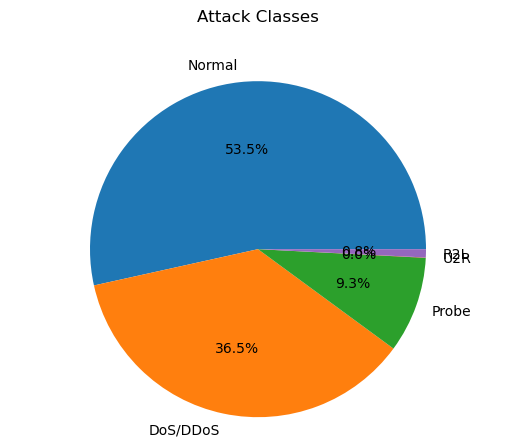

In [26]:
normal = (df.attack_class == 0).sum()
dos_ddos = (df.attack_class == 1).sum()
probe = (df.attack_class == 2).sum()
u2r = (df.attack_class == 3).sum()
r2l = (df.attack_class == 4).sum()
attack_classes = [normal, dos_ddos, probe, u2r, r2l]

labels = ['Normal', 'DoS/DDoS', 'Probe', 'U2R', 'R2L']
plt.pie(attack_classes, labels=labels, autopct='%1.1f%%')
plt.title('Attack Classes\n\n')
plt.axis('equal')
plt.show()


In [27]:
attack_vs_protocol = pd.crosstab((df.attack_class == 1), df.protocol_type)
attack_vs_protocol

protocol_type,icmp,tcp,udp
attack_class,,,
False,5444,60500,14101
True,2847,42188,892


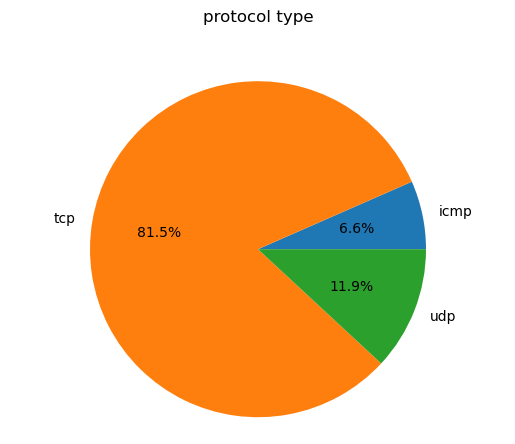

In [28]:
icmp = attack_vs_protocol.icmp.sum()
tcp = attack_vs_protocol.tcp.sum()
udp = attack_vs_protocol.udp.sum()
myData = [icmp , tcp,udp]
my_labels = 'icmp','tcp' ,'udp' 
plt.pie(myData,labels=my_labels ,autopct='%1.1f%%')
plt.title('protocol type\n\n')
plt.axis('equal')
plt.show()

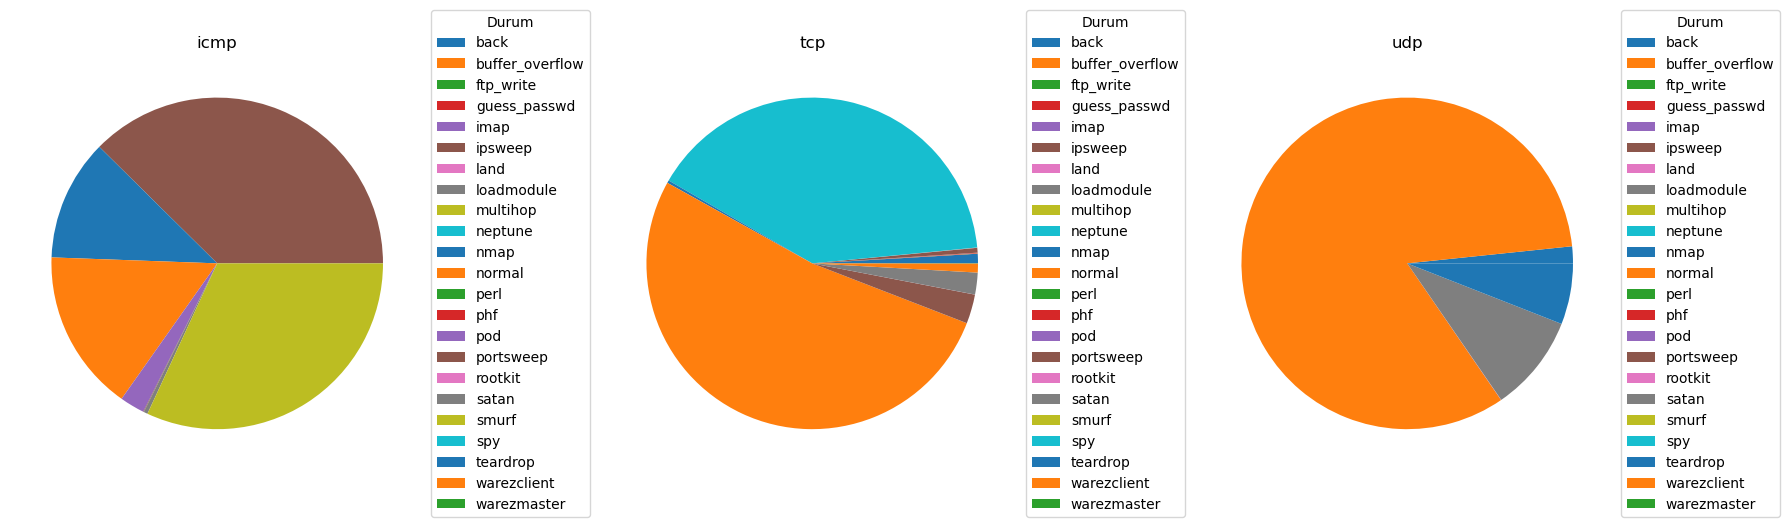

In [29]:
protocol_df = df.groupby(['attack', 'protocol_type']).size().reset_index(name='counts')
protocol_pivot = protocol_df.pivot(index='attack', columns='protocol_type', values='counts')
protocol_pivot = protocol_pivot.fillna(0)

bake_pies([protocol_pivot.icmp, protocol_pivot.tcp, protocol_pivot.udp], ['icmp', 'tcp', 'udp'])
plt.show()

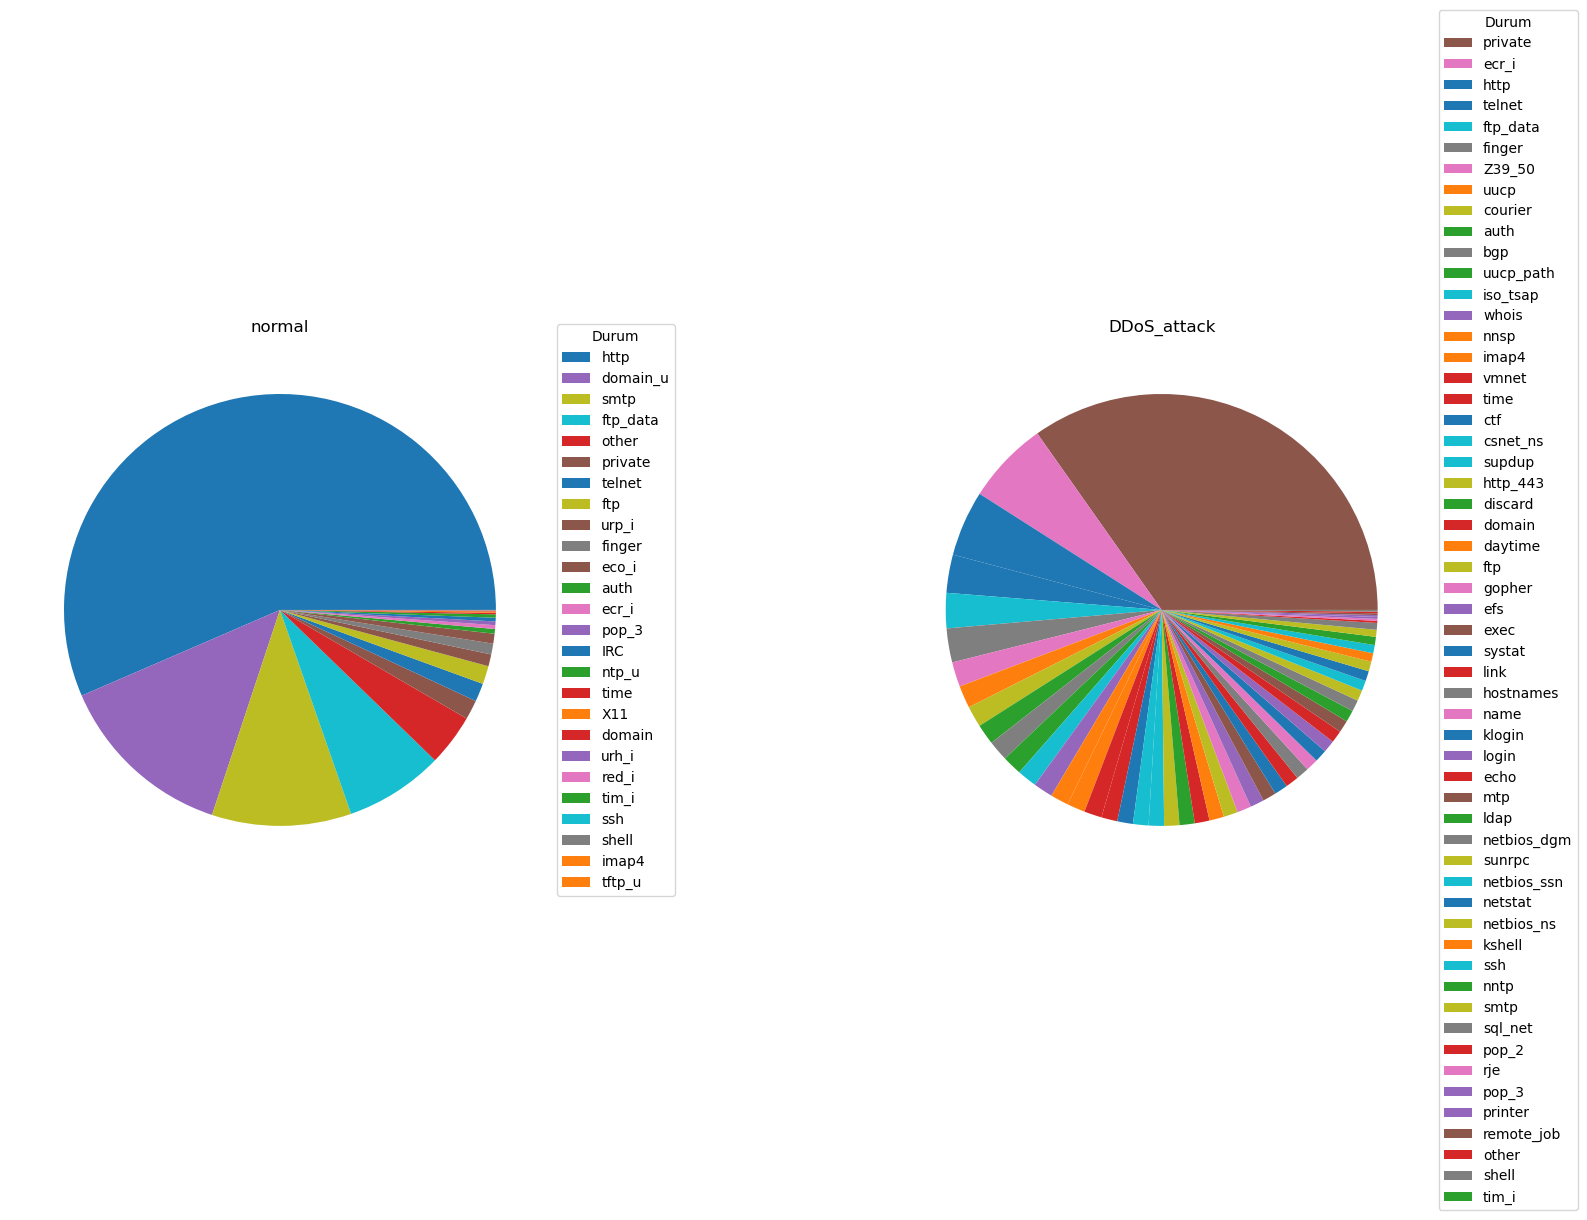

In [30]:
normal_services = df.loc[df.attack_class == 0].service.value_counts()
DDoS_attack_services = df.loc[df.attack_class == 1].service.value_counts()

flag_axs = bake_pies([normal_services, DDoS_attack_services], ['normal','DDoS_attack'])
plt.show()

In [31]:
service_vs_protocol = pd.crosstab(df.service, df.protocol_type,)
service_vs_protocol

protocol_type,icmp,tcp,udp
service,,,
IRC,0,187,0
X11,0,73,0
Z39_50,0,862,0
aol,0,2,0
auth,0,955,0
...,...,...,...
urp_i,602,0,0
uucp,0,780,0
uucp_path,0,689,0


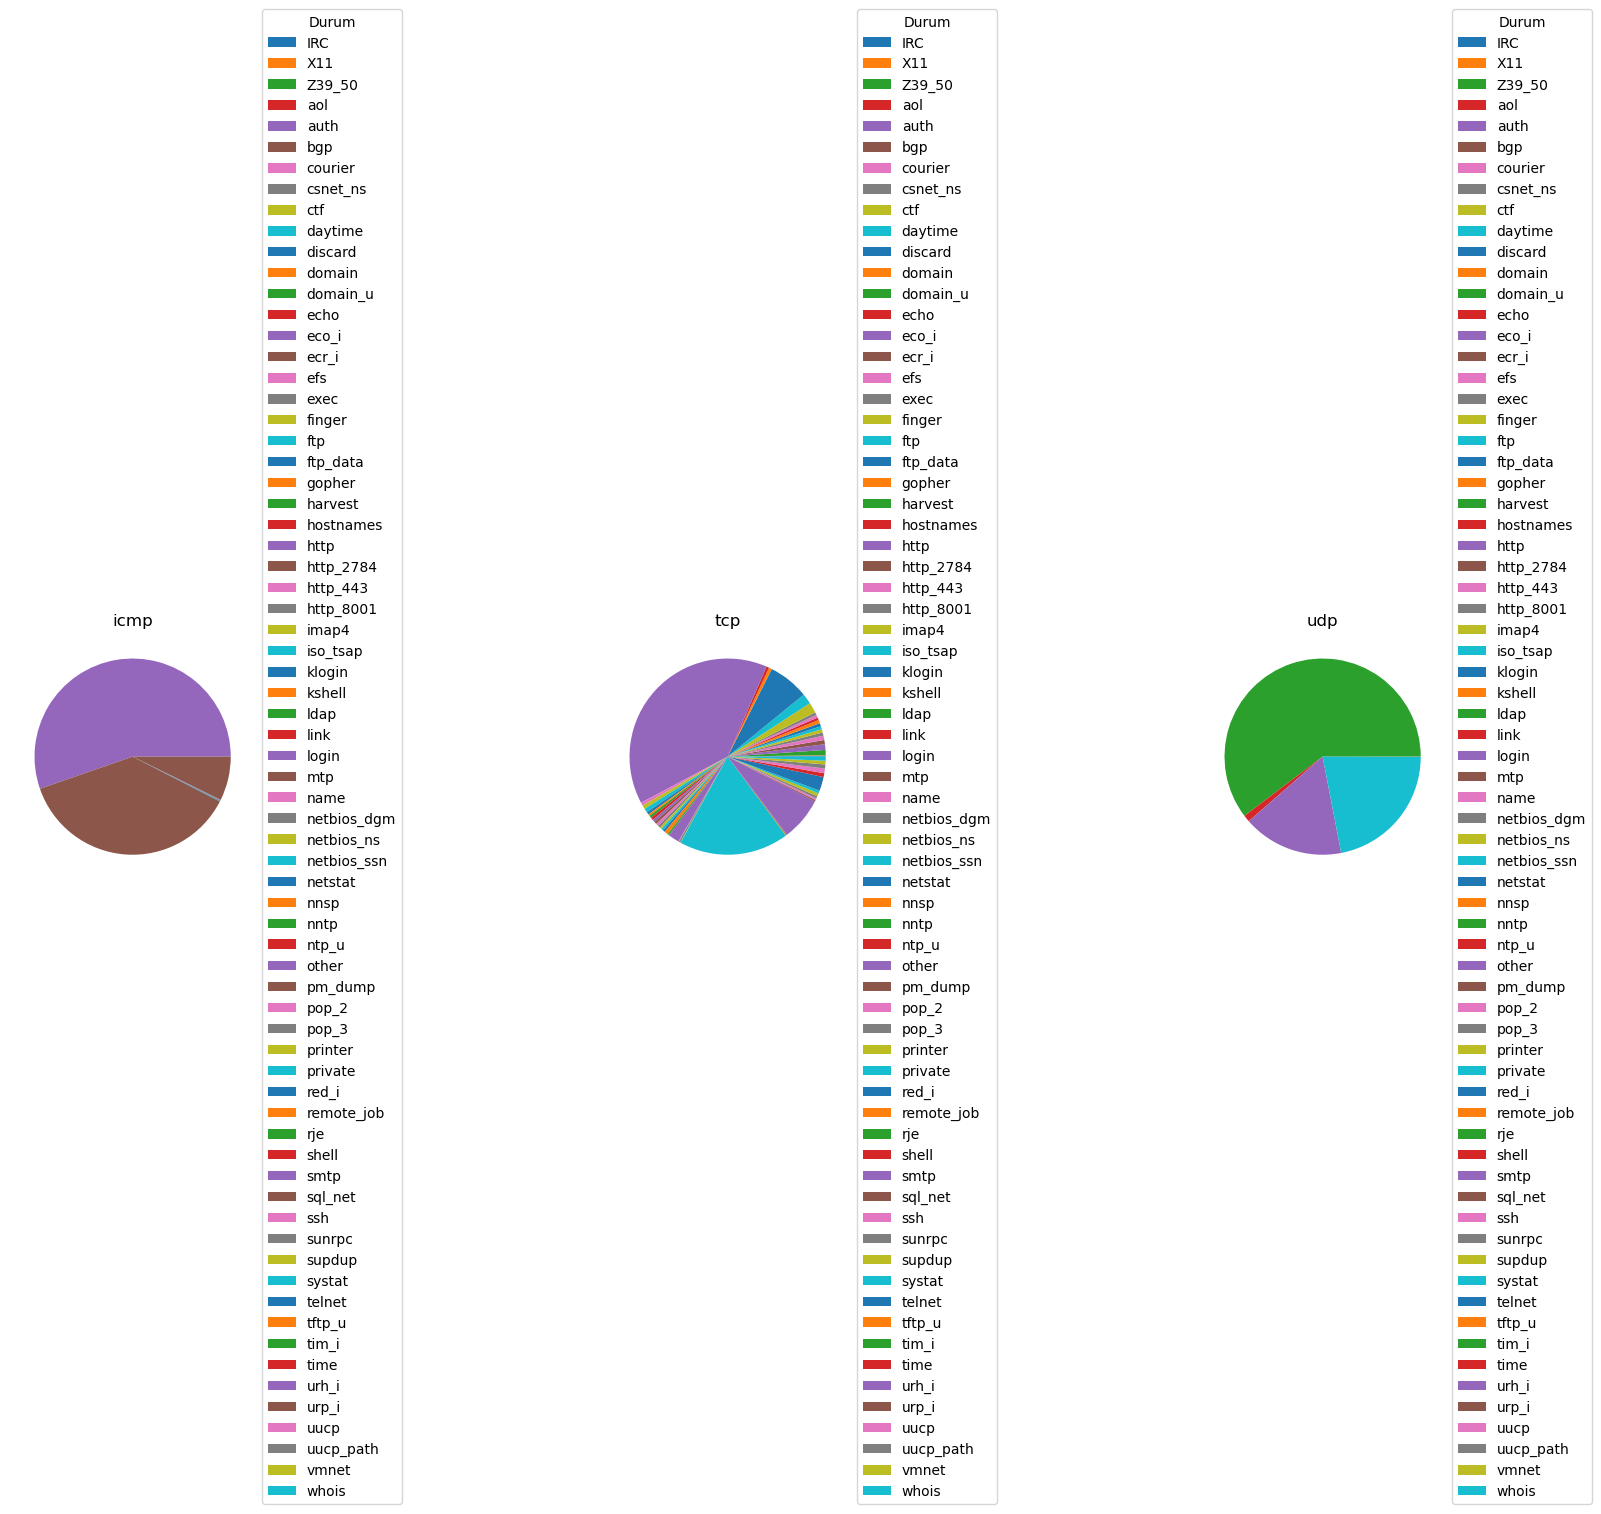

In [32]:
bake_pies([service_vs_protocol.icmp, service_vs_protocol.tcp, service_vs_protocol.udp], ['icmp', 'tcp', 'udp'])
plt.show()

# DATA ENCODING

In [33]:
df = pd.get_dummies(df,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [34]:
test_df = pd.get_dummies(test_df,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [35]:
df.head() 

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
2,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
3,0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
4,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False


In [36]:
test_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
1,2,12983,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,20,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,1,0,15,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False
4,0,267,14515,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False


In [37]:
drop_cols = ['attack' ]  
df.drop(drop_cols, axis=1, inplace=True)    

In [38]:
drop_cols = ['attack' ]  
test_df.drop(drop_cols, axis=1, inplace=True)  

In [39]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Columns: 125 entries, duration to SH
dtypes: bool(84), float64(15), int64(26)
memory usage: 49.5 MB


In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Columns: 119 entries, duration to SH
dtypes: bool(78), float64(15), int64(26)
memory usage: 8.7 MB


# FEATURE SELECTION

In [41]:
normal = df[df.attack_class == 0]

In [42]:
normal_test= test_df[test_df.attack_class == 0]

In [43]:
DDoS = df[df.attack_class == 1]

In [44]:
DDoS_test= test_df[test_df.attack_class == 1 ]

In [45]:
total_data = pd.concat([normal, DDoS], ignore_index=True)

In [46]:
total_data_test = pd.concat([normal_test, DDoS_test], ignore_index=True)

In [47]:
total_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
2,0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
3,0,287,2251,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
4,0,300,13788,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113273,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
113274,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
113275,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
113276,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False


In [48]:
total_data_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,2,12983,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,267,14515,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
2,0,1022,387,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
3,0,327,467,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
4,0,616,330,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17309,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
17310,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
17311,1,2599,293,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
17312,0,1032,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [49]:
corr= total_data.corr()
corr_y = abs(corr['attack_class'])
highest_corr = corr_y[corr_y > 0.1]
highest_corr.sort_values(ascending=True)

uucp                           0.100117
RSTO                           0.101961
ftp_data                       0.103014
Z39_50                         0.105358
icmp                           0.111136
wrong_fragment                 0.114329
dst_host_diff_srv_rate         0.120568
other                          0.121218
diff_srv_rate                  0.148637
dst_host_same_src_port_rate    0.152444
REJ                            0.156761
tcp                            0.166673
ecr_i                          0.179735
rerror_rate                    0.188424
srv_rerror_rate                0.189330
dst_host_srv_rerror_rate       0.189395
dst_host_rerror_rate           0.195263
smtp                           0.198570
dst_host_srv_diff_host_rate    0.209941
domain_u                       0.243095
udp                            0.251740
srv_diff_host_rate             0.269118
level                          0.291393
private                        0.458538
dst_host_count                 0.499389


In [50]:
corr= total_data_test.corr()
corr_y = abs(corr['attack_class'])
highest_corr_test = corr_y[corr_y >0.1]
highest_corr_test.sort_values(ascending=True)

tcp                            0.129309
S3                             0.133760
diff_srv_rate                  0.144034
duration                       0.165151
RSTO                           0.169658
dst_host_srv_diff_host_rate    0.180977
RSTR                           0.184177
dst_host_diff_srv_rate         0.189095
level                          0.199219
icmp                           0.201125
domain_u                       0.202760
ecr_i                          0.216899
telnet                         0.236645
srv_diff_host_rate             0.269138
udp                            0.290055
private                        0.364017
S0                             0.388486
srv_serror_rate                0.413560
serror_rate                    0.414029
dst_host_serror_rate           0.415862
dst_host_srv_serror_rate       0.426524
count                          0.449259
REJ                            0.471252
dst_host_count                 0.505173
http                           0.516853


In [51]:
highest_corr_columns= highest_corr.index

In [52]:
highest_corr_test_columns= highest_corr_test.index

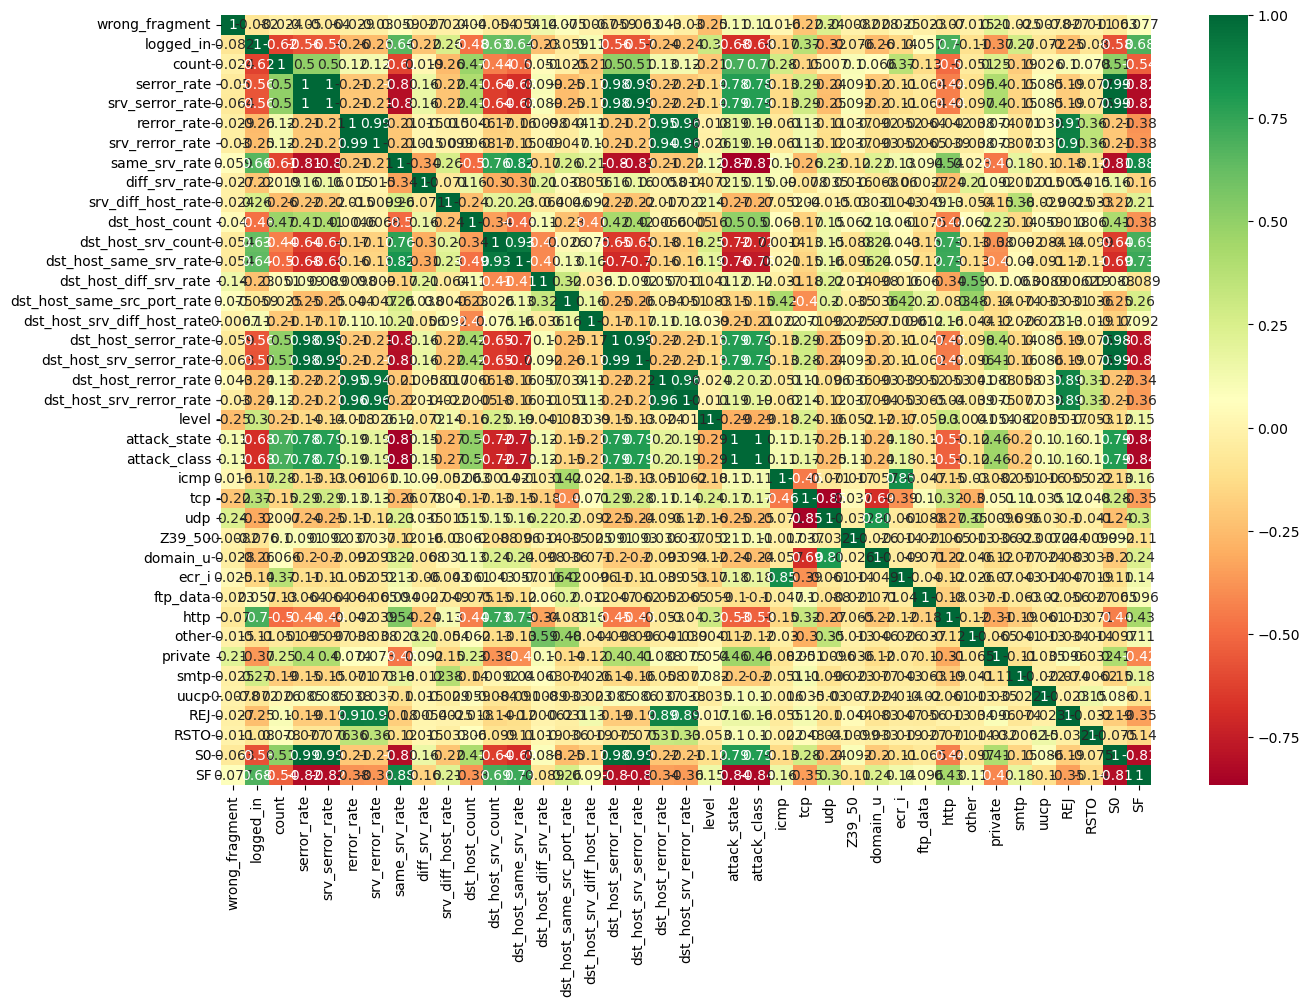

In [53]:
plt.figure(figsize=(15,10))
g=sns.heatmap(total_data[highest_corr.index].corr(),annot=True,cmap="RdYlGn")

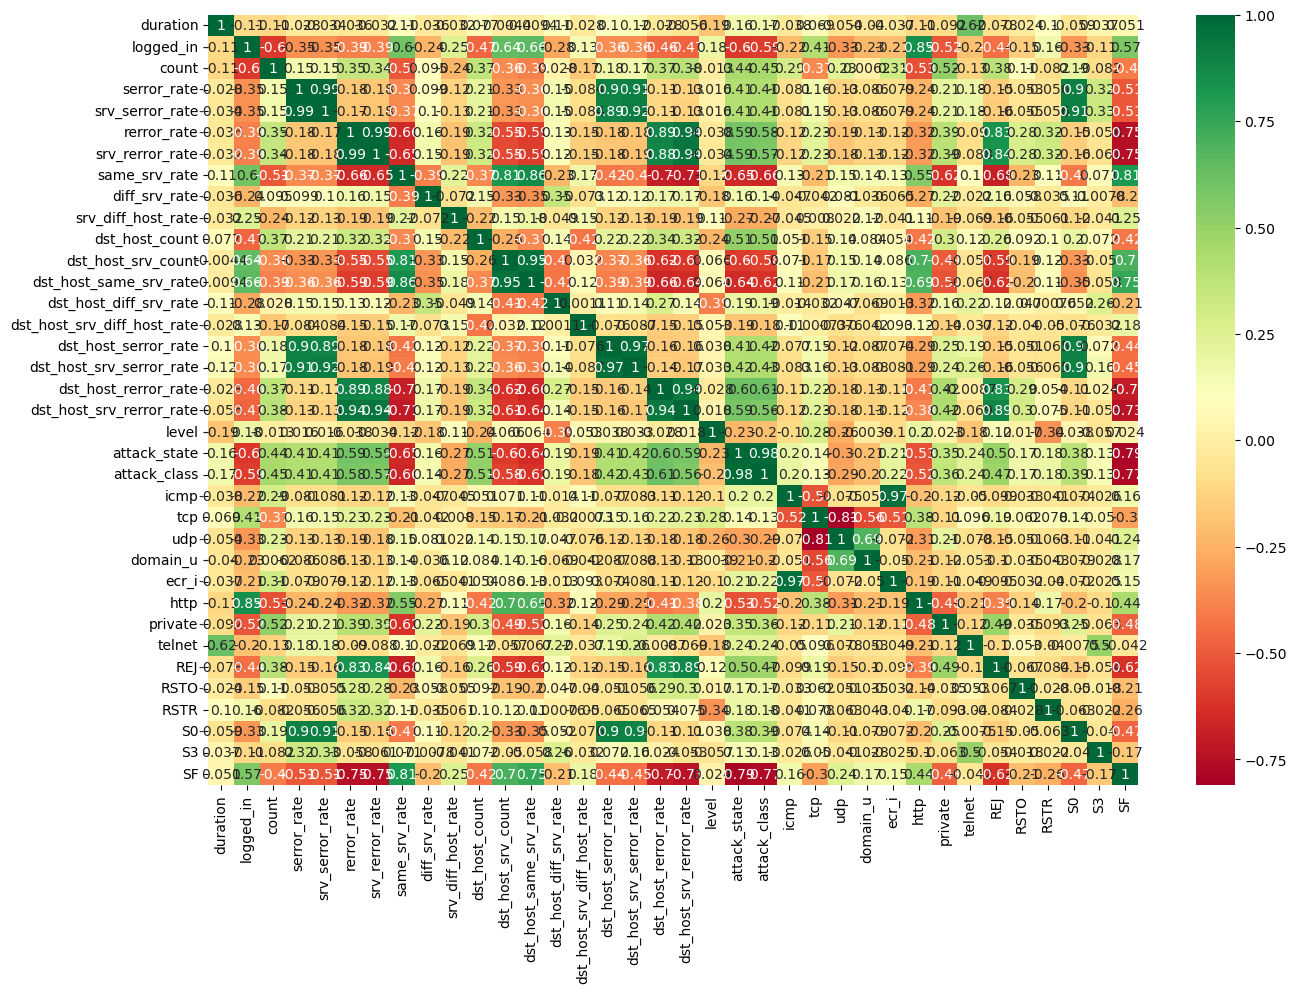

In [54]:
plt.figure(figsize=(15,10))
g=sns.heatmap(total_data_test[highest_corr_test.index].corr(),annot=True,cmap="RdYlGn")

In [55]:
drop_cols = df.loc[:,[i for i in list(df.columns) if i not in [
'diff_srv_rate',                
'dst_host_same_src_port_rate', 
'REJ',
'tcp',                            
'ecr_i',                         
'rerror_rate',                    
'srv_rerror_rate',                
'dst_host_srv_rerror_rate',       
'dst_host_rerror_rate',           
'smtp',                           
'dst_host_srv_diff_host_rate',    
'domain_u',                       
'udp',                            
'srv_diff_host_rate',             
'private',                        
'dst_host_count',                 
'http',                           
'logged_in',                      
'count',
'dst_host_srv_count',             
'dst_host_same_srv_rate',         
'serror_rate',                    
'srv_serror_rate',                
'dst_host_serror_rate',           
'S0',                             
'dst_host_srv_serror_rate',       
'SF',                             
'same_srv_rate',                 
'attack_state',                  
'attack_class', 
'other',
'icmp',                         
'wrong_fragment',               
'dst_host_diff_srv_rate',   
'RSTO',
'ftp_data',
'Z39_50',
'uucp'                          
]]]

In [56]:
#drop_cols = ['wrong_fragment','duration','src_bytes','dst_bytes','land','urgent','hot','num_failed_logins','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','srv_count']  
df.drop(drop_cols, axis=1, inplace=True)  
df


,wrong_fragment,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,...,ftp_data,http,other,private,smtp,uucp,REJ,RSTO,S0,SF
0,0,0,13,0.0,0.0,0.0,0.0,0.08,0.15,0.00,...,False,False,True,False,False,False,False,False,False,True
1,0,0,123,1.0,1.0,0.0,0.0,0.05,0.07,0.00,...,False,False,False,True,False,False,False,False,True,False
2,0,1,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,...,False,True,False,False,False,False,False,False,False,True
3,0,1,30,0.0,0.0,0.0,0.0,1.00,0.00,0.09,...,False,True,False,False,False,False,False,False,False,True
4,0,0,121,0.0,0.0,1.0,1.0,0.16,0.06,0.00,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,184,1.0,1.0,0.0,0.0,0.14,0.06,0.00,...,False,False,False,True,False,False,False,False,True,False
125968,0,0,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,...,False,False,False,True,False,False,False,False,False,True
125969,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,...,False,False,False,False,True,False,False,False,False,True
125970,0,0,144,1.0,1.0,0.0,0.0,0.06,0.05,0.00,...,False,False,False,False,False,False,False,False,True,False


In [57]:
drop_cols1 = test_df.loc[:,[i for i in list(test_df.columns) if i not in [
'diff_srv_rate',                
'dst_host_same_src_port_rate', 
'REJ',
'tcp',                            
'ecr_i',                         
'rerror_rate',                    
'srv_rerror_rate',                
'dst_host_srv_rerror_rate',       
'dst_host_rerror_rate',           
'smtp',                           
'dst_host_srv_diff_host_rate',    
'domain_u',                       
'udp',                            
'srv_diff_host_rate',             
'private',                        
'dst_host_count',                 
'http',                           
'logged_in',                      
'count',                          
'dst_host_srv_count',             
'dst_host_same_srv_rate',         
'serror_rate',                    
'srv_serror_rate',                
'dst_host_serror_rate',           
'S0',                             
'dst_host_srv_serror_rate',       
'SF',                             
'same_srv_rate',                 
'attack_state',                 
'attack_class', 
'other',
'icmp',                         
'wrong_fragment',               
'dst_host_diff_srv_rate',   
'RSTO',
'ftp_data',
'Z39_50',
'uucp'
]]]

In [58]:
#drop_cols = ['src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','srv_count' ,'dst_host_same_src_port_rate']  
test_df.drop(drop_cols1, axis=1, inplace=True)  
test_df

,wrong_fragment,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,...,ftp_data,http,other,private,smtp,uucp,REJ,RSTO,S0,SF
0,0,0,136,0.0,0.00,1.0,1.0,0.01,0.06,0.00,...,False,False,False,True,False,False,True,False,False,False
1,0,0,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,...,True,False,False,False,False,False,False,False,False,True
2,0,0,1,0.0,0.00,0.0,0.0,1.00,0.00,1.00,...,False,False,False,False,False,False,False,False,False,True
3,0,0,1,0.0,0.12,1.0,0.5,1.00,0.00,0.75,...,False,False,False,False,False,False,False,True,False,False
4,0,1,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,...,False,False,False,False,True,False,False,False,False,True
22539,0,1,2,0.0,0.00,0.0,0.0,1.00,0.00,0.18,...,False,True,False,False,False,False,False,False,False,True
22540,0,1,5,0.0,0.00,0.0,0.0,1.00,0.00,0.20,...,False,True,False,False,False,False,False,False,False,True
22541,0,0,4,0.0,0.00,0.0,0.0,1.00,0.00,0.33,...,False,False,False,False,False,False,False,False,False,True


In [59]:
data = df.copy()

In [60]:
test_data = test_df.copy()

#  CLASSIFICATION WITHOUT NORMALIZATION

In [61]:
X_train = df.drop('attack_class'  , axis = 1)
X_test = test_df.drop('attack_class' , axis = 1)
y_train = df['attack_class']
y_test = test_df['attack_class']

In [62]:
X_train

,wrong_fragment,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,...,ftp_data,http,other,private,smtp,uucp,REJ,RSTO,S0,SF
0,0,0,13,0.0,0.0,0.0,0.0,0.08,0.15,0.00,...,False,False,True,False,False,False,False,False,False,True
1,0,0,123,1.0,1.0,0.0,0.0,0.05,0.07,0.00,...,False,False,False,True,False,False,False,False,True,False
2,0,1,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,...,False,True,False,False,False,False,False,False,False,True
3,0,1,30,0.0,0.0,0.0,0.0,1.00,0.00,0.09,...,False,True,False,False,False,False,False,False,False,True
4,0,0,121,0.0,0.0,1.0,1.0,0.16,0.06,0.00,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,184,1.0,1.0,0.0,0.0,0.14,0.06,0.00,...,False,False,False,True,False,False,False,False,True,False
125968,0,0,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,...,False,False,False,True,False,False,False,False,False,True
125969,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,...,False,False,False,False,True,False,False,False,False,True
125970,0,0,144,1.0,1.0,0.0,0.0,0.06,0.05,0.00,...,False,False,False,False,False,False,False,False,True,False


In [63]:
y_train

0         0
1         1
2         0
3         0
4         1
         ..
125967    1
125968    0
125969    0
125970    1
125971    0
Name: attack_class, Length: 125972, dtype: int64

In [64]:
def add_predictions(data_set,predictions,y):
    prediction_series = pd.Series(predictions, index=y.index)

    # we need to add the predicted and actual outcomes to the data
    predicted_vs_actual = data_set.assign(predicted=prediction_series)
    original_data = predicted_vs_actual.assign(actual=y).dropna()
    conf_matrix = confusion_matrix(original_data['actual'], 
                                   original_data['predicted'])
    
    # capture rows with failed predictions
    base_errors = original_data[original_data['actual'] != original_data['predicted']]
    
    # drop columns with no value
    non_zeros = base_errors.loc[:,(base_errors != 0).any(axis=0)]

    # idetify the type of error
    false_positives = non_zeros.loc[non_zeros.actual==0]
    false_negatives = non_zeros.loc[non_zeros.actual==1]

    # put everything into an object
    prediction_data = {'data': original_data,
                       'confusion_matrix': conf_matrix,
                       'errors': base_errors,
                       'non_zeros': non_zeros,
                       'false_positives': false_positives,
                       'false_negatives': false_negatives}
    
    return prediction_data

### NAIVE BAYES

In [65]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,gnb_pred))

Accuracy :  0.8033092312469503


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

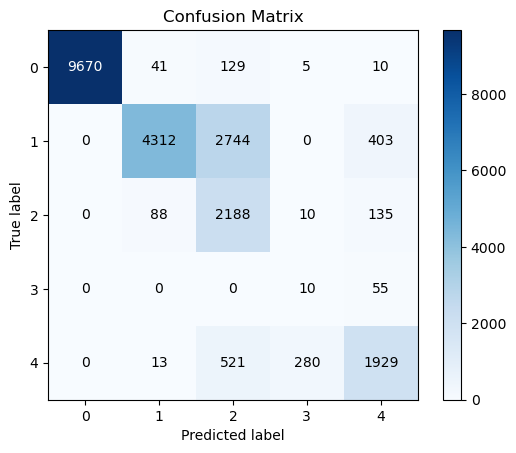

In [66]:
splt.plot_confusion_matrix(y_test, gnb_pred)

In [67]:
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9855
           1       0.97      0.58      0.72      7459
           2       0.39      0.90      0.55      2421
           3       0.03      0.15      0.05        65
           4       0.76      0.70      0.73      2743

    accuracy                           0.80     22543
   macro avg       0.63      0.66      0.61     22543
weighted avg       0.89      0.80      0.82     22543



### DECISION TREE

In [68]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
dt_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, dt_pred))

Accuracy: 0.8865723284389833


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

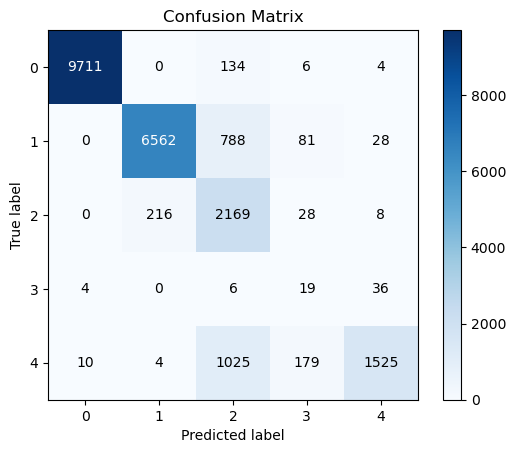

In [69]:
splt.plot_confusion_matrix(y_test, dt_pred)

In [70]:
print(classification_report(y_test, dt_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9855
           1       0.97      0.88      0.92      7459
           2       0.53      0.90      0.66      2421
           3       0.06      0.29      0.10        65
           4       0.95      0.56      0.70      2743

    accuracy                           0.89     22543
   macro avg       0.70      0.72      0.68     22543
weighted avg       0.93      0.89      0.90     22543



### K-Nearest Neighbors

In [71]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn = knn.fit(X_train , y_train)
knn_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))

Accuracy: 0.735971254935013


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

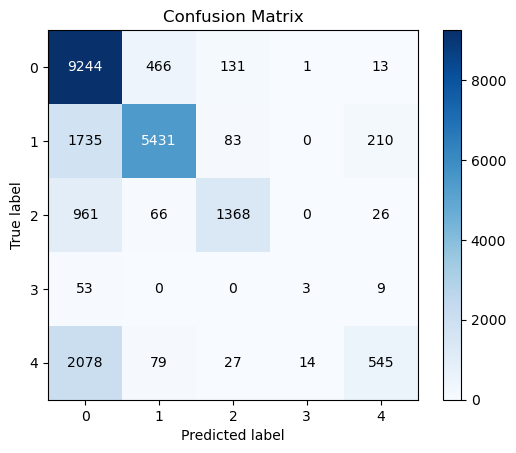

In [72]:
splt.plot_confusion_matrix(y_test, knn_pred)

In [73]:
print(classification_report(y_test, knn_pred)) 

              precision    recall  f1-score   support

           0       0.66      0.94      0.77      9855
           1       0.90      0.73      0.80      7459
           2       0.85      0.57      0.68      2421
           3       0.17      0.05      0.07        65
           4       0.68      0.20      0.31      2743

    accuracy                           0.74     22543
   macro avg       0.65      0.50      0.53     22543
weighted avg       0.76      0.74      0.71     22543



### RANDOM FOREST

In [74]:
rm = RandomForestClassifier()
rm.fit(X_train,y_train)
rm_pred=rm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, rm_pred))

Accuracy: 0.884664862706827


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

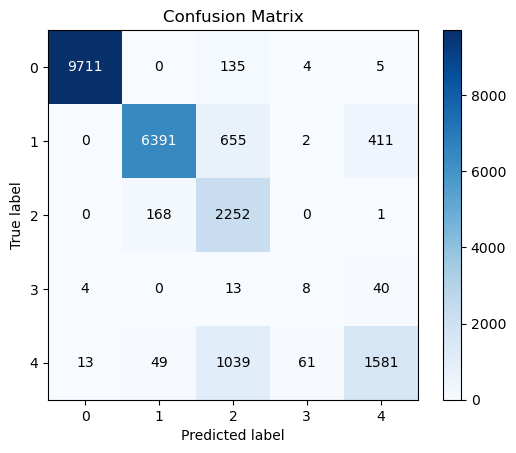

In [75]:
splt.plot_confusion_matrix(y_test, rm_pred)

In [76]:
print(classification_report(y_test, rm_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9855
           1       0.97      0.86      0.91      7459
           2       0.55      0.93      0.69      2421
           3       0.11      0.12      0.11        65
           4       0.78      0.58      0.66      2743

    accuracy                           0.88     22543
   macro avg       0.68      0.69      0.67     22543
weighted avg       0.91      0.88      0.89     22543



### SUPPORT VECTOR MACHINES

In [77]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, svm_pred))

Accuracy: 0.8843543450294992


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

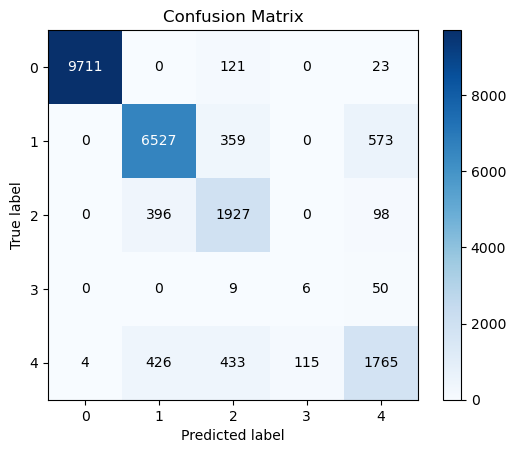

In [78]:
splt.plot_confusion_matrix(y_test, svm_pred)

In [79]:
print(classification_report(y_test, svm_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9855
           1       0.89      0.88      0.88      7459
           2       0.68      0.80      0.73      2421
           3       0.05      0.09      0.06        65
           4       0.70      0.64      0.67      2743

    accuracy                           0.88     22543
   macro avg       0.66      0.68      0.67     22543
weighted avg       0.89      0.88      0.89     22543



# CLASSIFICATION WITH NORMALIZATION

In [80]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train) 
X_test= mms.transform(X_test)

### NAIVE BAYES

In [81]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,gnb_pred))

Accuracy :  0.7599254757574413


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

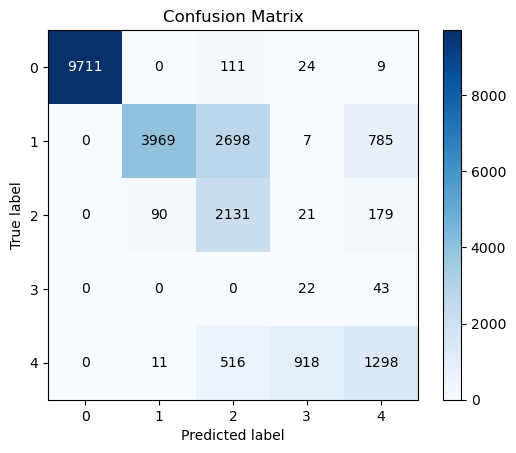

In [82]:
splt.plot_confusion_matrix(y_test, gnb_pred)

In [83]:
print(classification_report(y_test, gnb_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9855
           1       0.98      0.53      0.69      7459
           2       0.39      0.88      0.54      2421
           3       0.02      0.34      0.04        65
           4       0.56      0.47      0.51      2743

    accuracy                           0.76     22543
   macro avg       0.59      0.64      0.56     22543
weighted avg       0.87      0.76      0.78     22543



### DECISION TREE

In [84]:
from sklearn import tree
import matplotlib.pyplot as plt
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
dt_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, dt_pred))

Accuracy: 0.8840881870203611


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

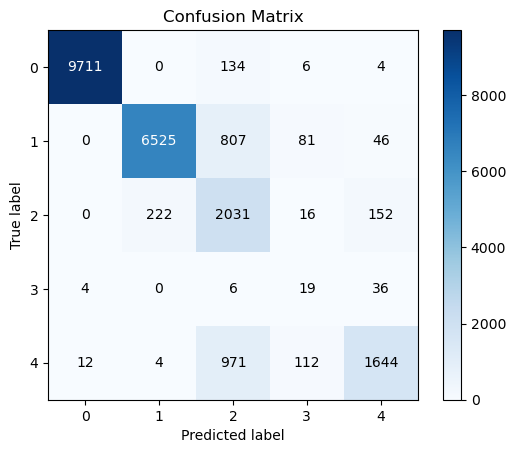

In [85]:
splt.plot_confusion_matrix(y_test, dt_pred)

In [86]:
print(classification_report(y_test, dt_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9855
           1       0.97      0.87      0.92      7459
           2       0.51      0.84      0.64      2421
           3       0.08      0.29      0.13        65
           4       0.87      0.60      0.71      2743

    accuracy                           0.88     22543
   macro avg       0.69      0.72      0.68     22543
weighted avg       0.92      0.88      0.89     22543



### K-Nearest Neighbors

In [87]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn = knn.fit(X_train , y_train)
knn_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))

Accuracy: 0.8710464445725946


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

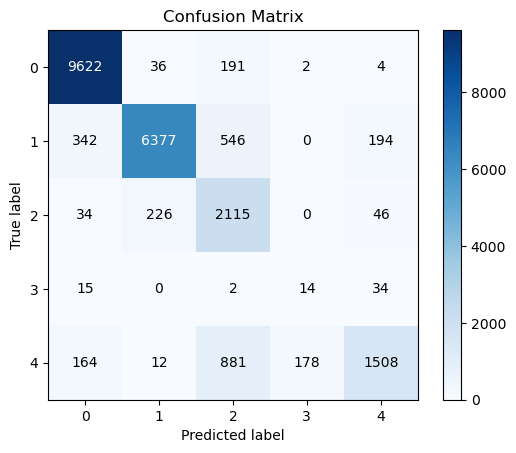

In [88]:
splt.plot_confusion_matrix(y_test, knn_pred)

In [89]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      9855
           1       0.96      0.85      0.90      7459
           2       0.57      0.87      0.69      2421
           3       0.07      0.22      0.11        65
           4       0.84      0.55      0.67      2743

    accuracy                           0.87     22543
   macro avg       0.68      0.69      0.67     22543
weighted avg       0.89      0.87      0.87     22543



### RANDOM FOREST

In [90]:
rm = RandomForestClassifier()
rm.fit(X_train,y_train)
rm_pred=rm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, rm_pred))

Accuracy: 0.8945127090449363


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

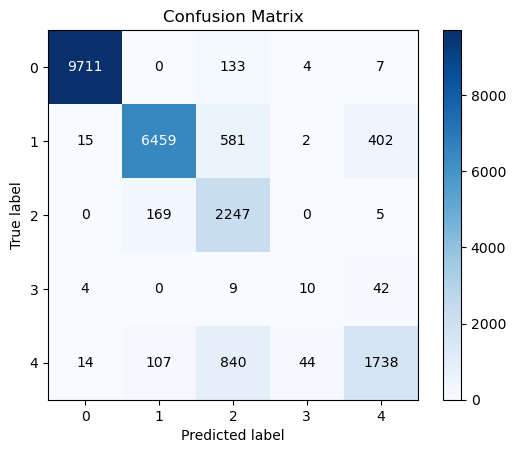

In [91]:
splt.plot_confusion_matrix(y_test, rm_pred)

In [92]:
print(classification_report(y_test, rm_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9855
           1       0.96      0.87      0.91      7459
           2       0.59      0.93      0.72      2421
           3       0.17      0.15      0.16        65
           4       0.79      0.63      0.70      2743

    accuracy                           0.89     22543
   macro avg       0.70      0.71      0.70     22543
weighted avg       0.91      0.89      0.90     22543



### SUPPORT VECTOR MACHINES

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, svm_pred))

In [ ]:
splt.plot_confusion_matrix(y_test, svm_pred)